## Tiny NeRF (A PyTorch implementation)

Source paper: [*NeRF: Representing scenes as neural radiance fields for view synthesis*](https://arxiv.org/abs/2003.08934)

Based on https://colab.research.google.com/drive/1rO8xo0TemN67d4mTpakrKrLp03b9bgCX

### Step 1: Setup

In [ ]:
# Clone repo if in colab...

In [2]:
from typing import Optional
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

from src.models import *
from src.training import *
from src.utils import *

In [3]:
# Seed RNG, for repeatability
seed = 9458
torch.manual_seed(seed)
np.random.seed(seed)

In [4]:
# Get device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using GPU:", torch.cuda.is_available())

Using GPU: False


### The volume raycasting algorithm:

...

### Load Data

In [6]:
# Download sample data used in the official tiny_nerf example
if not os.path.exists('data/tiny_nerf_data.npz'):
    os.system("wget https://people.eecs.berkeley.edu/~bmild/nerf/tiny_nerf_data.npz -P data")

images, tform_cam2world, height, width, focal_length, near_thresh, far_thresh = load_data("data/tiny_nerf_data.npz", device)

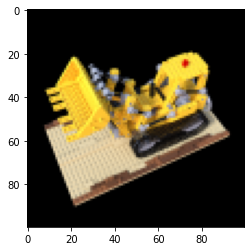

In [12]:
plt.imshow(images[99].numpy())
plt.show()

### Initialize Model

In [13]:
# Define model and optimizer
model = VeryTinyNerfModel()
model.to(device)

VeryTinyNerfModel(
  (layer1): Linear(in_features=39, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=4, bias=True)
)

### Training

In [ ]:
train_tinynerf(
    model,
    images,
    tform_cam2world,
    4,
    height, width, focal_length, near_thresh, far_thresh,
    device
)

  0%|          | 0/1000 [00:00<?, ?it/s]